# My first Data Science Project with Pandas and Matplotlib

I have recently started learning Data Science and after learning Pandas and Matplotlib I thought it would be a good start to have a hands-on on these topics by doing a simple project. This could also be your first project in the journey of Data Science.

This does not uses scikit learn or model builiding concepts.

### Importing necessary libraries

In [1]:
import pandas as pd
import os as dir_reader
import matplotlib.pyplot as plt
import numpy as np

We have 12 months of Sales data in **12 different CSV files**. We are merging it into a single file

# Task 1: Merging Data

We can get an idea of what the sales data of one month contain.

In [2]:
df = pd.read_csv("./SalesData/Sales_January_2019.csv")

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [3]:
files = [file for file in dir_reader.listdir("./SalesData")]
print(files)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


We have created a list with name of all CSV files into it.

In [4]:
final_data = pd.DataFrame()

for file in files:
    # Reading each CSV as a data frame and then using concat function to combine it into a single DataFrame
    df = pd.read_csv("./SalesData/"+file)
    final_data = pd.concat([final_data,df])
    
final_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


After checking that our FinalData has the combined data, we should export is a CSV

In [5]:
final_data.to_csv("./FinalData/Final_Data.csv", index=False)

# Confirming that we have exported CSV successfully

all_data = pd.read_csv("./FinalData/Final_Data.csv")

all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


# Task 2. Knowing and cleaning our data

#### We should know our data first. For this we should know the number of rows and colums from the dataframe

In [6]:
all_data.shape

(186850, 6)

We know that we have 18650 rows and 6 columns. First we should see what all columns we have before we start working with data

In [7]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

We now we have 6 columns. Let us see what data does Order Date contain

In [8]:
all_data['Order Date']

0         04/19/19 08:46
1                    NaN
2         04/07/19 22:30
3         04/12/19 14:38
4         04/12/19 14:38
               ...      
186845    09/17/19 20:56
186846    09/01/19 16:00
186847    09/23/19 07:39
186848    09/19/19 17:30
186849    09/30/19 00:18
Name: Order Date, Length: 186850, dtype: object

### We have the date as well the time of the sale. What if we want to analyse the sales of data during particular month?
For this we need to create a new column **Month** which would contain the month of the sales. But before we do that, we have seen above that we have NaN value in our table. There might be some string values too. So we should move on to data cleaning first.

To start cleaning our data, we need to find out NaN values from our data frame. To start, as there are thousands of data and it is usually difficult to find out each and every such rows so we could see how much unique values does our **Product** column have.

In [9]:
pd.unique(all_data['Quantity Ordered'])

array(['2', nan, '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8',
       '9'], dtype=object)

We can see that we have **nan** and **Quantity Ordered** as values which we don't want. We will start with dropping nan values

### Dropping NaN values

In [10]:
all_data.dropna(axis=0,how='all',inplace=True)

In [11]:
all_data.shape

(186305, 6)

To clean the data further, we need to remove the strings in the data frame. We create a temporary data frame with conditions to do that

In [12]:
temp_df = all_data[all_data['Quantity Ordered']=='Quantity Ordered']

temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


We can see that there are 355 rows probabily having all rows contaning data frame header as values. We need to remove those rows!

In [13]:
all_data = all_data[all_data['Quantity Ordered']!='Quantity Ordered']

all_data.shape

(185950, 6)

We can further see that number of rows have decreased from 186305 to 185950

In [14]:
186305 - 185950

355

We can see that we have removed all 355 rows having the garbage values. Hoping that we don't have any NaN values or garbage values, we should proceed to adding one more column for **Month**. If we face any problem further then we will recheck our data for garbage values.

In [15]:
all_data['Month'] = all_data['Order Date'].str[0:2]

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### Now to get more information, we would look into Purchase Address Column.

In [16]:
pd.unique(all_data['Purchase Address'])

array(['917 1st St, Dallas, TX 75001',
       '682 Chestnut St, Boston, MA 02215',
       '669 Spruce St, Los Angeles, CA 90001', ...,
       '981 4th St, New York City, NY 10001',
       '840 Highland St, Los Angeles, CA 90001',
       '220 12th St, San Francisco, CA 94016'], dtype=object)

#### We can see that there are various different purchase addressess with us. We would not be interested with individual address but we are surely interested in the city and state of purchase.
For this, we would create a new column city and parse the data from "Purchase Address"
Also, there could be a duplicate of city around the world so we should create a column for State too.

In [17]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data['State'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[2][1:3])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,Boston,MA
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,Los Angeles,CA


Now let us check if we have any problem with the columns we have created.

In [18]:
pd.unique(all_data['City'])

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [19]:
pd.unique(all_data['State'])

array(['TX', 'MA', 'CA', 'WA', 'GA', 'NY', 'OR', 'ME'], dtype=object)

#### Now we can see that the city and state column is filled with just few unique values. This will come to rescue when we will need to analyse any of our data with respect to city or state.

For the analysis, the more the useful data, the better it is. The column Purchase Address is of no use for us so we should drop it.

In [20]:
all_data = all_data.drop(['Purchase Address'],axis=1)

In [21]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,04,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,04,Boston,MA
3,176560,Google Phone,1,600,04/12/19 14:38,04,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,04,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,04,Los Angeles,CA


#### To further work with data, we should see the data type for each column in our data frame

In [22]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Month               object
City                object
State               object
dtype: object

To work with **Order ID, Quantity Ordered, Price Each** and **Month**, we need them to be of integer type. So we need to convert all these rows to integer.

In [23]:
all_data['Order ID'] = pd.to_numeric(all_data['Order ID'])
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Month'] = pd.to_numeric(all_data['Month'])

all_data.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Month                 int64
City                 object
State                object
dtype: object

Now we can see that we have convered all column to our required data type.

#### Now as we go back to our question, to analyse the sales of a particular month, we have month column but, what about sales column? 
We need to create a sales column and this is pretty straightforward

In [24]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,City,State,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,4,Dallas,TX,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,4,Boston,MA,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,4,Los Angeles,CA,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,4,Los Angeles,CA,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,4,Los Angeles,CA,11.99


#### Thinking about what more could be helpful for us to get some insights from the data, we see that Order Date contains date and time of the order which could be helpful sometimes later. We should parse those values in different columns

In [25]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [26]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,City,State,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,Dallas,TX,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,Boston,MA,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,Los Angeles,CA,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,Los Angeles,CA,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,Los Angeles,CA,11.99


In [27]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [28]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,City,State,Sales,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,Dallas,TX,23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,Boston,MA,99.99,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,Los Angeles,CA,600.00,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,Los Angeles,CA,11.99,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,Los Angeles,CA,11.99,9,27


# Task 3: Answering the Questions

### Question 1. Which month had the most and least sales of data?
We can figure this out by using group by function of **by using Matplotlib** function to draw a graph

In [29]:
sales_analysis = all_data.groupby(['Month']).sum()
sales_analysis

,Order ID,Quantity Ordered,Price Each,Sales,Hour,Minute
Month,,,,,,
1,1421630798,10903,1.811768e+06,1.822257e+06,139485,282440
2,1871052592,13449,2.188885e+06,2.202022e+06,172669,354885
3,2564810956,17005,2.791208e+06,2.807100e+06,218969,447559
4,3387347100,20558,3.367671e+06,3.390670e+06,262259,544186
5,3345871523,18667,3.135125e+06,3.152607e+06,238780,487899
6,2932976072,15253,2.562026e+06,2.577802e+06,195528,402436
7,3284139576,16072,2.632540e+06,2.647776e+06,206169,417349
8,2899373917,13448,2.230345e+06,2.244468e+06,172289,353857
9,2948726831,13109,2.084992e+06,2.097560e+06,168513,341698


### We can figure out from the table that December month had the highest number of sales \\$4.61 million whereas January had the least sale with \\$1.82 million only


#### Data science is all about visualization data and telling stories. So why not get this interpretation using graphs?

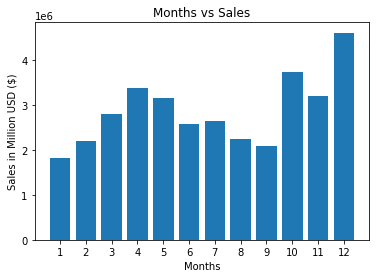

In [30]:
plt.bar(range(1,13),sales_analysis['Sales'])
plt.xticks(range(1,13))
plt.xlabel("Months")
plt.ylabel("Sales in Million USD ($)")
plt.title("Months vs Sales")
plt.show()

#### Conclusion: 

Now we can get the same results from the simple bar graph. As a data scientist we should think why there is sales so high in month of December or why is the sale so less in January. One reason could be Christmas as people in US send and receive so much of gifts in December which could shoot up the sales. For further analysing the data for reason of increase in sales, we would need advertising data and many other data which are not with us.

### Question 2: Which city had the highest and lowest sales of data?

#### To come to a conclusion, we should analyse the data with city data, we should group the data by city

In [31]:
city_analysis = all_data.groupby('City').sum()

city_analysis

,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,,
Atlanta,3423838407,16602,2.779908e+06,104794,2.795499e+06,214264,442932
Austin,2280982185,11153,1.809874e+06,69829,1.819582e+06,141946,289060
Boston,4598265261,22528,3.637410e+06,141112,3.661642e+06,288225,590442
Dallas,3415643578,16730,2.752628e+06,104620,2.767975e+06,214390,435155
Los Angeles,6811084693,33289,5.421435e+06,208325,5.452571e+06,427444,866638
New York City,5736333884,27932,4.635371e+06,175741,4.664317e+06,357696,733598
Portland,2868861092,14053,2.307747e+06,87765,2.320491e+06,179632,368389
San Francisco,10304443952,50239,8.211462e+06,315520,8.262204e+06,643265,1319477
Seattle,3406693974,16553,2.733296e+06,104941,2.747755e+06,213292,436368


Let us draw the bar graph again!

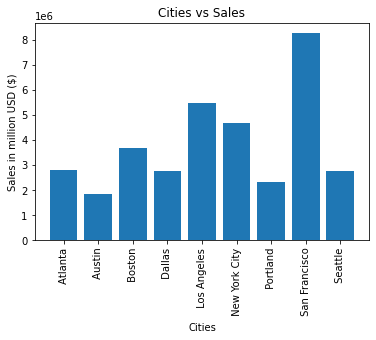

In [32]:
Cities = all_data.sort_values(by='City',ascending=1)['City'].unique()

# Cities = [city for city, df in all_data.groupby('City')]

plt.bar(Cities, city_analysis['Sales'])
plt.xticks(Cities, rotation='vertical',size=10)
plt.xlabel("Cities")
plt.ylabel("Sales in million USD ($)")
plt.title("Cities vs Sales")

plt.show()

### Conclusion

#### We can conclude from the data that we San Francisco has the highest number of sales whereas Austin has the least number of sales.

Now again thinking as a data scientist, we should think why San Francisco has the highest number of sales. Well, looking at the products, we could say that the store is an electronics store and San Francisco is the Silicon Valley. We can create many such hypothesis and then evaluate those according to the business model.

### Question 3: What time should we display advertisements to maximize the likelihood of purchases?

To get the answer, we have the date and time for each order.

In [33]:
time_analysis = all_data.groupby('Hour').sum()

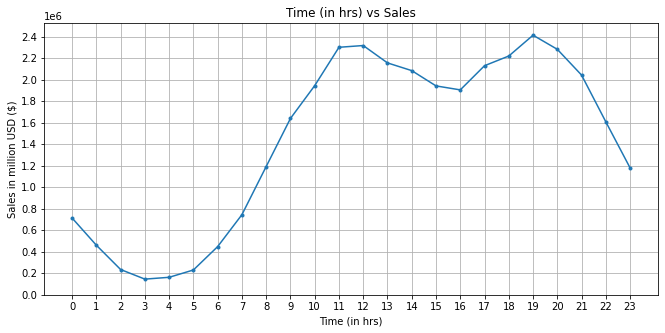

In [34]:
Hours = all_data.sort_values(by="Hour",ascending=1)['Hour'].unique()

# Hours = [hour for hour, df in all_data.groupby('Hour')]
plt.figure(figsize=(11,5))
plt.plot(Hours,time_analysis["Sales"],marker=('.'))
plt.grid()
plt.xticks(Hours)
plt.yticks(range(0,2500000,200000))
plt.ylabel("Sales in million USD ($)")
plt.xlabel("Time (in hrs)")
plt.title('Time (in hrs) vs Sales')

plt.show()

#### Conclusion

##### With this graph here, we can say that best time to display advertisments is before 11 AM and before 7 PM because those two are the times when there are most orders.

### Question 4: What products are most often sold together?


To answer this question, let us first look at the data

In [35]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,City,State,Sales,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,Dallas,TX,23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,Boston,MA,99.99,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,Los Angeles,CA,600.00,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,Los Angeles,CA,11.99,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,Los Angeles,CA,11.99,9,27


#### We can see that there are few rows with two same order ID but different Product. Bascially these products are often sold together

In [36]:
duplicate_data = all_data[all_data['Order ID'].duplicated(keep=False)]
duplicate_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,City,State,Sales,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,Los Angeles,CA,600.00,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,Los Angeles,CA,11.99,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,4,Los Angeles,CA,600.00,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,4,Los Angeles,CA,11.95,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,4,Boston,MA,99.99,11,31
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,4,Boston,MA,99.99,11,31
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,4,San Francisco,CA,5.98,17,0
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,4,San Francisco,CA,600.00,17,0
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,4,New York City,NY,14.95,11,7
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,4,New York City,NY,11.95,11,7


#### To group the common order ID ones to a new column where all the product is stored for single id is created

In [37]:
duplicate_data["Grouped"] = duplicate_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-37-97c66b797630>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_data["Grouped"] = duplicate_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [38]:
duplicate_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,City,State,Sales,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,Los Angeles,CA,600.00,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,Los Angeles,CA,11.99,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,4,Los Angeles,CA,600.00,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,4,Los Angeles,CA,11.95,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,4,Boston,MA,99.99,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


After combining the data the rows in **Grouped** column, we can see that there are multiple rows for same order, so let us drop the duplicates!

In [39]:
duplicate_data = duplicate_data.drop_duplicates()[['Order ID','Grouped']]

In [40]:
duplicate_data.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
4,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
19,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."


#### Now we need to convert the Data in Grouped column into a list along with the number of times it is repeated. For this we need to use itertools and collections from Python

In [41]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in duplicate_data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
keys = []
values = []

for key, value in count.most_common(10):
    print(key,value)
    keys.append(key)
    values.append(value)

keys_string = ',, '.join([', '.join(keyy) for keyy in keys])


('iPhone', 'Lightning Charging Cable') 2133
('Google Phone', 'USB-C Charging Cable') 2111
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 946
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 449
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


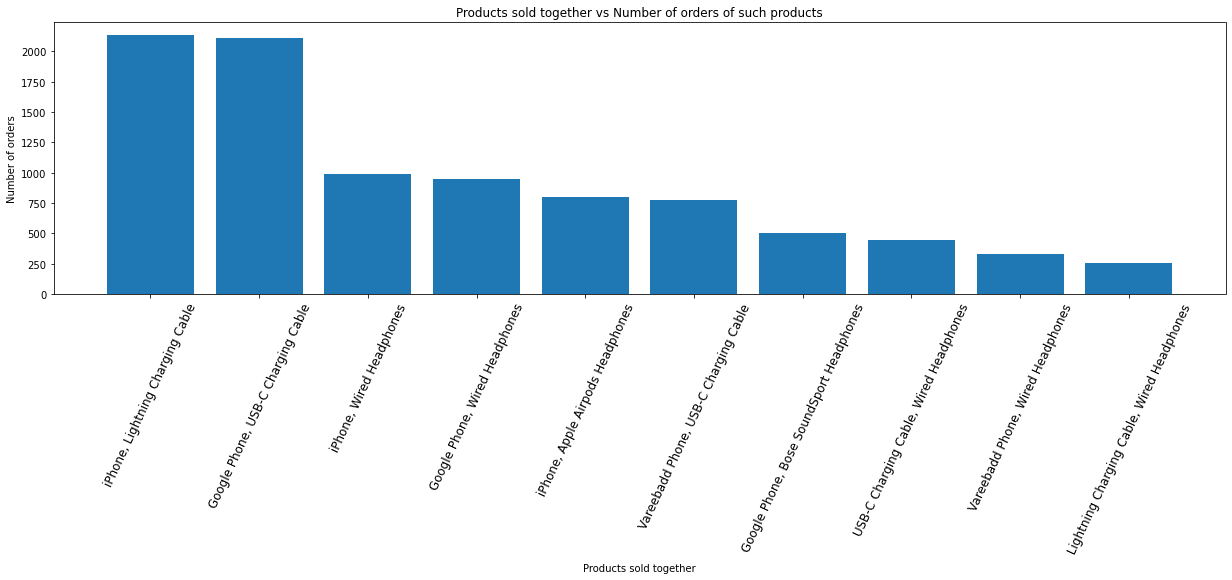

In [42]:
plt.figure(figsize=(21,5))
plt.bar(keys_string.split(",,"),values)
plt.xticks(rotation=65,size=12)
plt.xlabel('Products sold together')
plt.ylabel('Number of orders')
plt.title("Products sold together vs Number of orders of such products")
plt.show()

#### Conclusion

##### From the above analysis, we can say that IPhone and Lightining Charging Cables are two most brought things together

### Question 5: What product sold the most? Why do you think it did? 
To get an answer to this, we just need to group the Product columns with Quantity Ordered column

In [43]:
most_sold = all_data.groupby('Product').sum()
most_sold[['Quantity Ordered','Price Each','Sales']]

,Quantity Ordered,Price Each,Sales
Product,,,
20in Monitor,4129,451068.99,454148.71
27in 4K Gaming Monitor,6244,2429637.70,2435097.56
27in FHD Monitor,7550,1125974.93,1132424.50
34in Ultrawide Monitor,6199,2348718.19,2355558.01
AA Batteries (4-pack),27635,79015.68,106118.40
AAA Batteries (4-pack),31017,61716.59,92740.83
Apple Airpods Headphones,15661,2332350.00,2349150.00
Bose SoundSport Headphones,13457,1332366.75,1345565.43
Flatscreen TV,4819,1440000.00,1445700.00


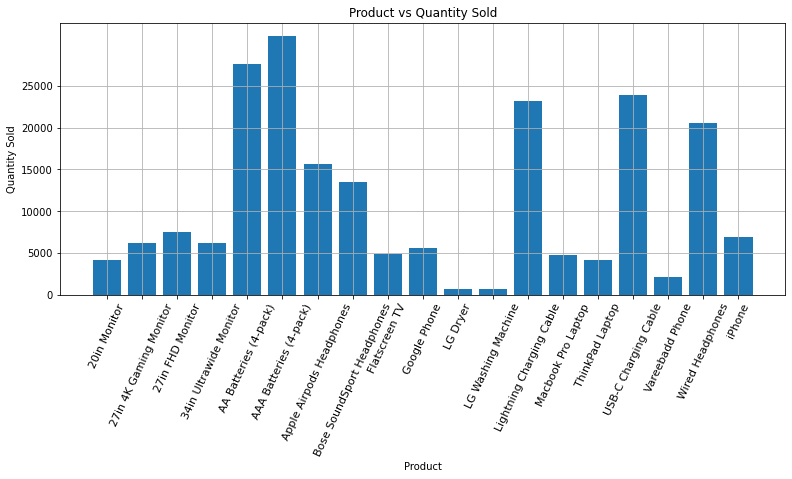

In [44]:
product=all_data.sort_values(by='Product',ascending=1)['Product'].unique()


plt.figure(figsize=(13,5))
plt.bar(product,most_sold['Quantity Ordered'])

plt.title("Product vs Quantity Sold")
plt.grid()
plt.xticks(rotation='65',size=11)
plt.yticks(range(0,30000,5000))
plt.ylabel('Quantity Sold')
plt.xlabel('Product')
plt.show()

### From the above analysis we can say that AAA Batteries(4 Pack) is the most sold product followed by AA Batteries(4 Pack). The answer to this question seems true because batteries are the most used and cheap product found everywhere.

To prove the above hypothesis, we would plot a multiaxis graph showing the quantity ordered and price per item for each product

<ipython-input-45-78d1d9251eaa>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product,rotation=65, size = 8)


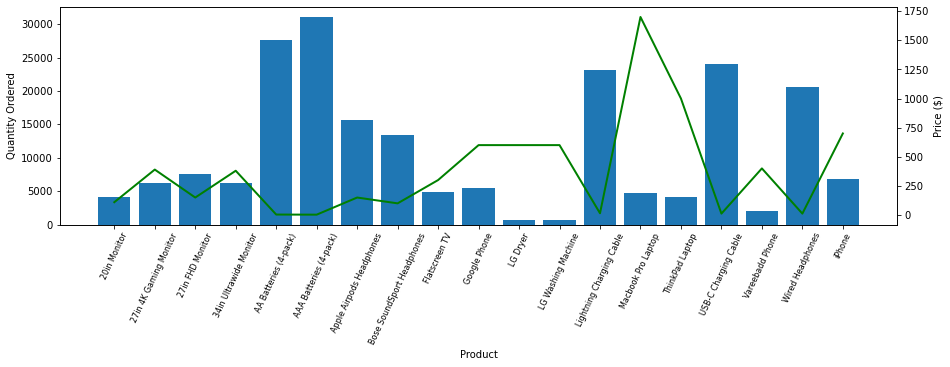

In [45]:
prices = all_data.groupby('Product').mean()

fig,ax1 = plt.subplots()
fig.set_figwidth(15)

ax2 = ax1.twinx()

ax1.bar(product,most_sold['Quantity Ordered'])
ax2.plot(product, prices['Price Each'],color="green",linewidth=2)

ax1.set_xlabel("Product")
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price ($)')

ax1.set_xticklabels(product,rotation=65, size = 8)

plt.show()

### In the above graph, we can prove the hypothesis that the lower the price, the more is the quantity selling of those products.

#### In the above steps we have tried to solve 5 questions which could be helpful for a business using this data. I hope you enjoyed the project. Ofcourse there could be many more questions arising from the data but these were the ones which I thought are a good start for a data science learner!